In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_med_df = pd.merge(mouse_df, clinical_df, on="Mouse ID", how="outer")

# Display the data table for preview
combined_med_df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = combined_med_df.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_vol).reset_index().drop("Metastatic Sites",axis=1)

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err = combined_med_df.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
std_err_df = pd.DataFrame(std_err).reset_index().drop("Metastatic Sites",axis=1)

# Preview DataFrame
std_err_df.head()


,Drug,Timepoint,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,NaN,0.000000
1,Capomulin,5,NaN,0.448593
2,Capomulin,10,NaN,0.702684
3,Capomulin,15,NaN,0.838617
4,Capomulin,20,NaN,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean = mean_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
pivot_err = std_err_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

pivot_err.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


Text(0, 0.5, 'Tumor Volume (mm3)')

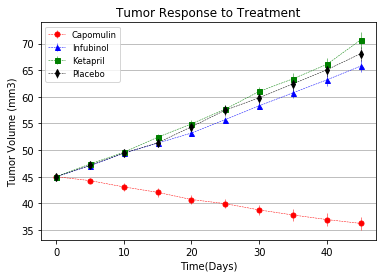

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_mean.index, pivot_mean["Capomulin"], 
             yerr=pivot_err["Capomulin"], 
             color="r", 
             marker="o", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean["Infubinol"], 
             yerr=pivot_err["Infubinol"], 
             color="b", 
             marker="^", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(pivot_mean.index, 
             pivot_mean["Ketapril"], 
             yerr=pivot_err["Ketapril"], 
             color="g", 
             marker="s", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(pivot_mean.index, 
             pivot_mean["Placebo"], 
             yerr=pivot_err["Placebo"], 
             color="k", 
             marker="d", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)

plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")

In [7]:
# Show the Figure
plt.show()

# Save the Figure
plt.savefig("../NewImages/Chart001_TumorResponse.png")

<Figure size 432x288 with 0 Axes>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = combined_med_df.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met).reset_index().drop("Tumor Volume (mm3)",axis=1)

# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_err = combined_med_df.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
met_err_df = pd.DataFrame(met_err).drop(["Mouse ID", "Tumor Volume (mm3)"],axis=1)

# Preview DataFrame
met_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_err = met_err_df.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pivot_met_err.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_mean = mean_met_df.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pivot_met_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Text(0, 0.5, 'Met. Sites')

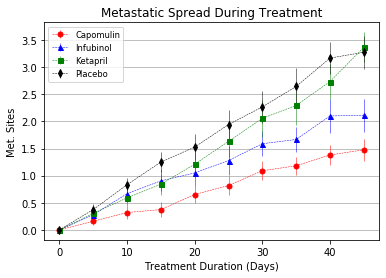

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_met_mean.index, 
             pivot_met_mean["Capomulin"], 
             yerr=pivot_met_err["Capomulin"], 
             color="r", 
             marker="o", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(pivot_met_mean.index, 
             pivot_met_mean["Infubinol"], 
             yerr=pivot_met_err["Infubinol"], 
             color="b", 
             marker="^", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(pivot_met_mean.index, 
             pivot_met_mean["Ketapril"], 
             yerr=pivot_met_err["Ketapril"], 
             color="g", 
             marker="s", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(pivot_met_mean.index, 
             pivot_met_mean["Placebo"], 
             yerr=pivot_met_err["Placebo"], 
             color="k", 
             marker="d", 
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)

plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

![Metastatic Spread During Treatment](../Images/spread.png)

In [13]:
# Show the Figure
plt.show()

# Save the Figure
plt.savefig("../NewImages/Chart002_MetastaticSpread.png")

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouse_count = combined_med_df.groupby(["Drug", "Timepoint"]).count()
mouse_count_df = pd.DataFrame(mouse_count).reset_index().drop(["Metastatic Sites", "Tumor Volume (mm3)"], axis=1)

mouse_count_df = mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse_count = mouse_count_df.pivot_table(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
pivot_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


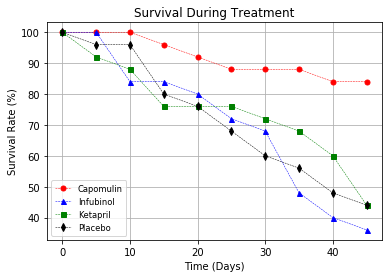

In [16]:
# Generate the Plot (Accounting for percentages)
plt.plot(pivot_mouse_count.index,
         100 * pivot_mouse_count["Capomulin"]/25, 
         color="r", 
         marker="o", 
         markersize=5, 
         linestyle="dashed", 
         linewidth=0.50)
plt.plot(pivot_mouse_count.index, 
         100 * pivot_mouse_count["Infubinol"]/25, 
         color="b", 
         marker="^", 
         markersize=5, 
         linestyle="dashed", 
         linewidth=0.50)
plt.plot(pivot_mouse_count.index, 
         100 * pivot_mouse_count["Ketapril"]/25,
         color="g", 
         marker="s", 
         markersize=5, 
         linestyle="dashed", 
         linewidth=0.50)
plt.plot(pivot_mouse_count.index, 
         100 * pivot_mouse_count["Placebo"]/25,
         color="k", 
         marker="d", 
         markersize=5, 
         linestyle="dashed", 
         linewidth=0.50)

plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid(axis="both")

# Save the Figure
plt.savefig("../NewImages/Chart003_Survival.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
drug_columns = ["Capomulin",
                "Ceftamin",
                "Infubinol",
                "Ketapril",
                "Naftisol",
                "Placebo",
                "Propriva",
                "Ramicane",
                "Stelasyn",
                "Zoniferol"]

pct_change = 100*(pivot_mean[drug_columns].iloc[-1]/pivot_mean[drug_columns].iloc[0]-1)

# Display the data to confirm
print(pct_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


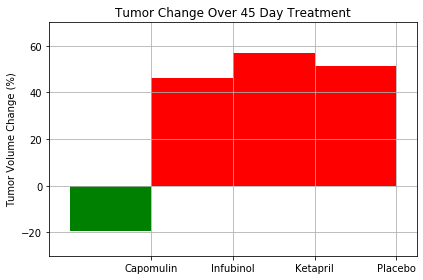

In [23]:
# Store all Relevant Percent Changes into a Tuple
rel_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
rel_pct_change = [-19.475303,  46.123472, 57.028795, 51.297960]
x_axis = np.arange(len(rel_pct_change))

# Orient widths. Add labels, tick marks, etc. 
plt.bar(x_axis, rel_pct_change, width=1, color=("g","r","r","r"), align="edge", label="rel_pct_change")

tick_locations = [value for value in x_axis + 1]
plt.xticks(tick_locations, rel_drugs)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")

plt.xlim(-.25, 4.25)
plt.ylim(-30, 70)

plt.grid(axis="both")

plt.tight_layout()

# Save the Figure
plt.savefig("../NewImages/Chart004_TumorChangeBar.png")

![Metastatic Spread During Treatment](../Images/change.png)